In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
# read data
df = pd.read_csv('../Data/Order.csv')
df.head()

,order_id,order_id_date,vehicle_no,PLACE_OF_SENDERS,PLACE_OF_RECEIVERS 1,PLACE_OF_RECEIVERS 2,PLACE_OF_RECEIVERS 3,Order Customer Id,Order City,Order Country,...,Order Item Quantity,Order Item Product Price,Order Item Profit Ratio,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Item Quantity in warehouse
0,d792cb16214,2021-05-15,KA590408,New York,Chincoteague Island,Fort Wayne,Mesa,7298,Rimini,Italia,...,1,159.990005,0.31,159.990005,131.190002,41.060001,Southern Europe,Emilia-Romaña,CLOSED,16
1,0d7a144bdd3,2021-05-15,TN30BC5917,San Jose,Exmore,Newark,Garland,8380,Lille,Francia,...,1,159.990005,0.16,159.990005,119.989998,19.559999,Western Europe,Norte-Paso de Calais-Picardía,PROCESSING,10
2,57da4fc703e,2021-08-04,TN22AR2748,Birmingham,Lawrenceville,Arlington,Scottsdale,5663,Charleroi,Bélgica,...,1,159.990005,0.26,159.990005,145.589996,37.849998,Western Europe,Henao,COMPLETE,8
3,1b038114c75,2021-05-16,TN28AQ0781,San Jose,Midlothian,Fort Wayne,Plano,7357,Montecatini Terme,Italia,...,1,159.990005,0.49,159.990005,132.789993,65.070000,Southern Europe,Toscana,ON_HOLD,13
4,bb4e55b4fd9,2021-05-15,TN68F1722,Boston,Virginia Beach,Baton Rouge,Garland,9969,Recklinghausen,Alemania,...,1,159.990005,-0.25,159.990005,135.990005,-34.000000,Western Europe,Renania del Norte-Westfalia,CLOSED,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    10000 non-null  object 
 1   order_id_date               10000 non-null  object 
 2   vehicle_no                  10000 non-null  object 
 3   PLACE_OF_SENDERS            10000 non-null  object 
 4   PLACE_OF_RECEIVERS 1        10000 non-null  object 
 5   PLACE_OF_RECEIVERS 2        10000 non-null  object 
 6   PLACE_OF_RECEIVERS 3        10000 non-null  object 
 7   Order Customer Id           10000 non-null  int64  
 8   Order City                  10000 non-null  object 
 9   Order Country               10000 non-null  object 
 10  Order Item Cardprod Id      10000 non-null  int64  
 11  Order Item Discount         10000 non-null  float64
 12  Order Item Discount Rate    10000 non-null  float64
 13  Order Item Id               1000

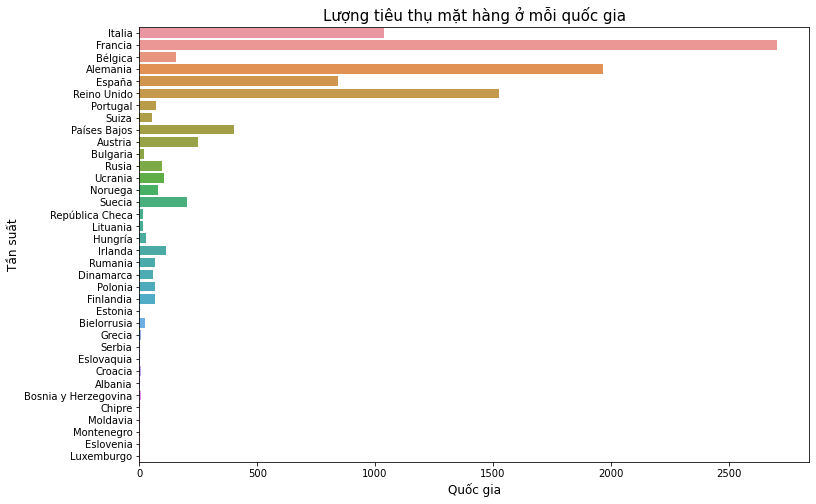

In [ ]:
# vẽ lượng tiêu thụ mặt hàng ở mỗi quốc gia
plt.figure(figsize=(12,8))
sns.countplot(y='Order Country', data=df)
plt.title('Lượng tiêu thụ mặt hàng ở mỗi quốc gia', fontsize=15)
plt.xlabel('Quốc gia', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Nhận xét: Ta thấy francia là quốc gia có lượng tiêu thụ mặt hàng nhiều nhất trong tập dữ liệu (khoảng 2700), tiếp đến là một số quốc gia như Alemania, Italia, España, etc. Còn lại các quốc gia khác có lượng tiêu thụ rất ít (khoảng 1000)

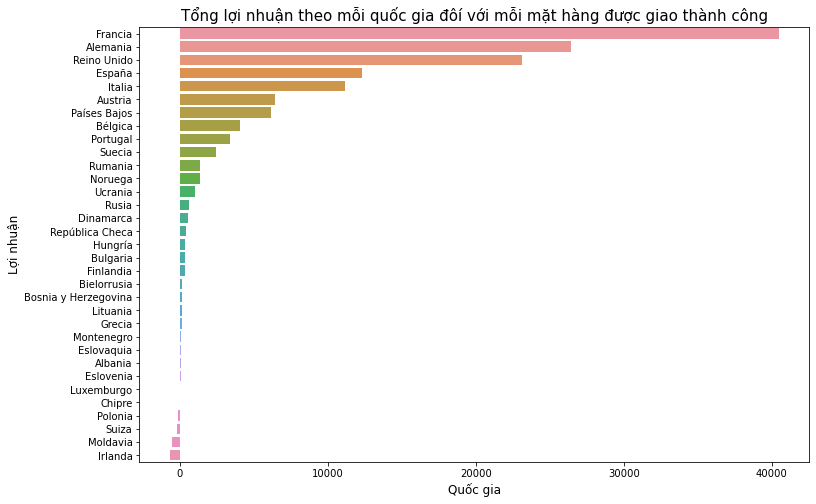

In [ ]:
# Tổng lợi nhuận theo mỗi quốc gia đôí với mỗi mặt hàng được giao thành công
plt.figure(figsize=(12,8))
# nhóm dữ liệu theo quốc gia, tính tổng lợi nhuận có Order Status = COMPLETE, sắp xếp giảm dần theo lợi nhuận
df_profit = df[df['Order Status'] == 'COMPLETE'].groupby('Order Country')['Order Profit Per Order'].sum().reset_index().sort_values(by='Order Profit Per Order', ascending=False)
sns.barplot(y='Order Country', x='Order Profit Per Order', data=df_profit)
plt.title('Tổng lợi nhuận theo mỗi quốc gia đôí với mỗi mặt hàng được giao thành công', fontsize=15)
plt.xlabel('Quốc gia', fontsize=12)
plt.ylabel('Lợi nhuận', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [ ]:
# convert Order Date từ kiểu object sang kiểu datetime
df['order_id_date'] = pd.to_datetime(df['order_id_date'])
# lấy ra năm từ Order Date
df['order_id_date'].dt.year.unique()

array([2021, 2020, 2019, 2018, 2022, 2005, 1899], dtype=int64)

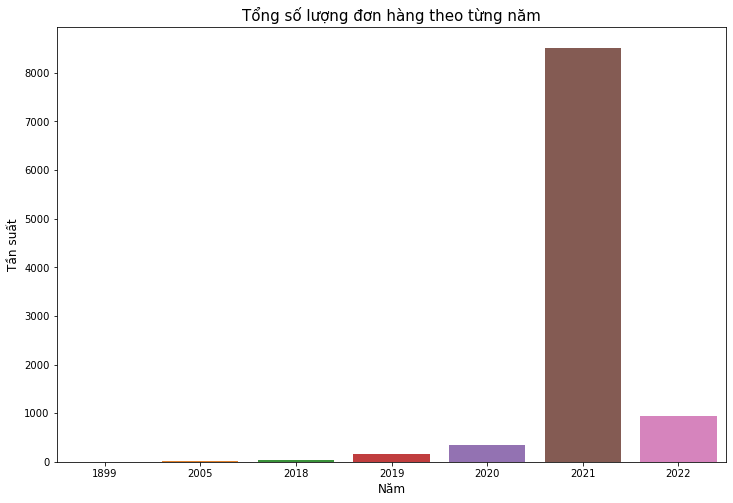

In [ ]:
# Tổng số lượng đơn hàng theo từng năm
plt.figure(figsize=(12,8))
sns.countplot(x=df['order_id_date'].dt.year)
plt.title('Tổng số lượng đơn hàng theo từng năm', fontsize=15)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Nhận xét: ta thấy được số lượng đơn hàng từ 1899 đến 2022 có xu hướng tăng, đặc biệt đột biến năm 2021 và đột ngột giảm năm 2022, hoặc là do dữ liệu năm 2022 chưa đầy đủ

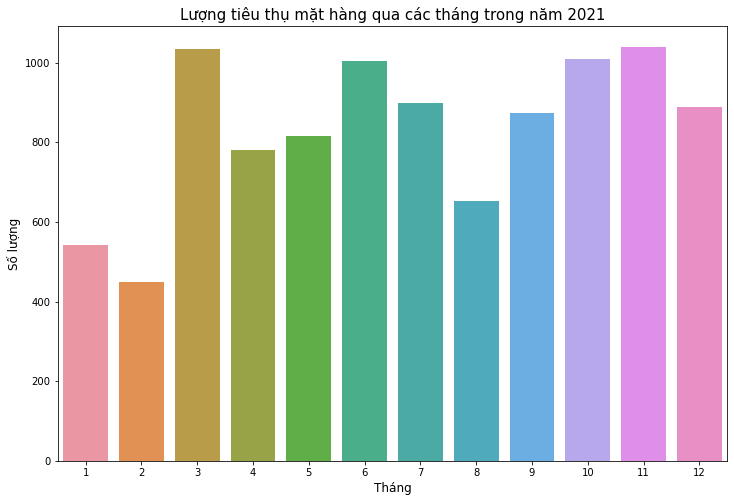

In [ ]:
# vẽ lượng tiêu thụ mặt hàng qua các tháng trong năm 2021
plt.figure(figsize=(12,8))
# nhóm dữ liệu theo tháng, tính tổng số lượng mặt hàng, sắp xếp giảm dần theo số lượng
df_month = df[df['order_id_date'].dt.year == 2021].groupby(df['order_id_date'].dt.month)['Order Item Quantity'].sum().reset_index().sort_values(by='Order Item Quantity', ascending=False)
sns.barplot(x='order_id_date', y='Order Item Quantity', data=df_month)
plt.title('Lượng tiêu thụ mặt hàng qua các tháng trong năm 2021', fontsize=15)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=0)
plt.show()

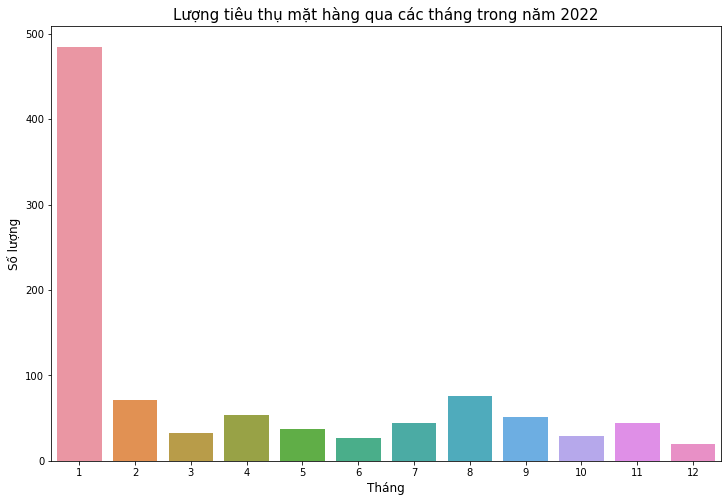

In [ ]:
# vẽ lượng tiêu thụ mặt hàng qua các tháng trong năm 2022
plt.figure(figsize=(12,8))
# nhóm dữ liệu theo tháng, tính tổng số lượng mặt hàng, sắp xếp giảm dần theo số lượng
df_month = df[df['order_id_date'].dt.year == 2022].groupby(df['order_id_date'].dt.month)['Order Item Quantity'].sum().reset_index().sort_values(by='Order Item Quantity', ascending=False)
sns.barplot(x='order_id_date', y='Order Item Quantity', data=df_month)
plt.title('Lượng tiêu thụ mặt hàng qua các tháng trong năm 2022', fontsize=15)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [ ]:
df['Order Item Id'].value_counts()

1270    37
1083    34
1374    32
1203    32
1177    32
        ..
1461    10
1140     9
1398     9
1421     9
1477     6
Name: Order Item Id, Length: 500, dtype: int64

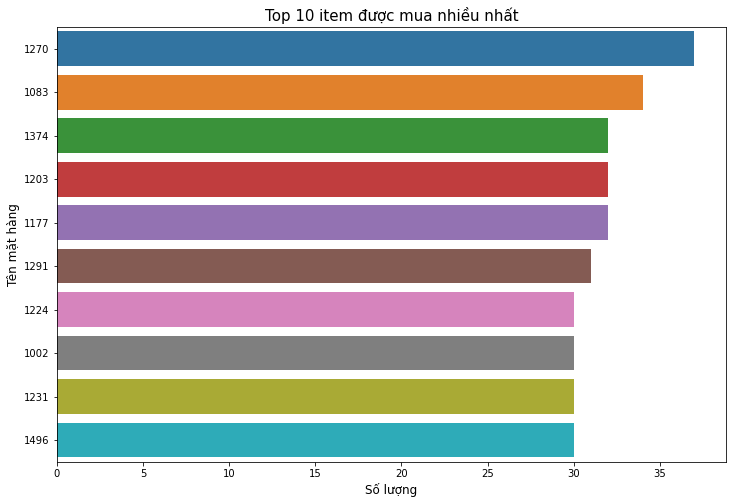

In [ ]:
# Top 10 item được mua nhiều nhất
plt.figure(figsize=(12,8))
sns.countplot(y='Order Item Id', data=df, order=df['Order Item Id'].value_counts().iloc[:10].index)
plt.title('Top 10 item được mua nhiều nhất', fontsize=15)
plt.xlabel('Số lượng', fontsize=12)
plt.ylabel('Tên mặt hàng', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Nhận xét: item có id 1270 là item có lượt mua nhiều nhất (khoảng 37), tiếp đến là item có id 1083 (khoảng 34),...

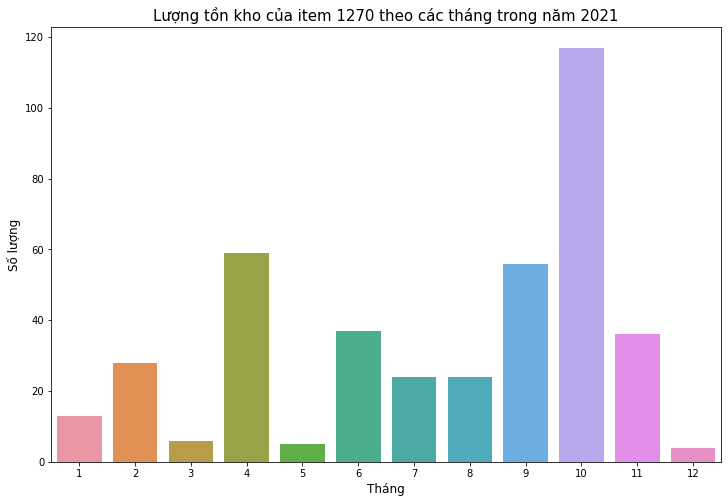

In [ ]:
# lượng tồn kho của item '1270' theo các tháng trong năm 2021
plt.figure(figsize=(12,8))
# lượng tồn kho bằng 'Item Quantity in warehouse' - 'Order Item Quantity'
df['Inventory'] = df['Item Quantity in warehouse'] - df['Order Item Quantity']
# nhóm dữ liệu theo tháng, tính tổng lượng tồn kho, sắp xếp giảm dần theo số lượng
df_month = df[(df['Order Item Id'] == 1270) & (df['order_id_date'].dt.year == 2021)].groupby(df['order_id_date'].dt.month)['Inventory'].sum().reset_index().sort_values(by='Inventory', ascending=False)
sns.barplot(x='order_id_date', y='Inventory', data=df_month)
plt.title('Lượng tồn kho của item 1270 theo các tháng trong năm 2021', fontsize=15)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Nhận xét: lượng hàng tồn kho của item '1270' không bị âm trong năm 2021, tuy nhiên lượng tồn kho vào tháng 10 cao hơn nhiều so với các tháng còn lại. Nhưng nhìn chung item '1270' có lượng tồn kho ổn định trong năm 2021